# Analyzing Netflix Content Data for Insight


### Introduction to the Notebook:
In this notebook, we will Analyze Netflix content data to extract insights about the types of content (Movies/TV Shows), trends across time, top-rated genres, and content popularity by country



### Step 1: Set up the environment

Importing necessary librarie and our data

In [950]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Netflix = pd.read_csv(r'C:\Users\Mohsu\Desktop\python workspace\Netflix Movies and TV Shows\netflix_titles.csv')
print('the first 5 rows of the dataset are :')
Netflix.head()

the first 5 rows of the dataset are :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [951]:
print('the information of the dataset is :')
Netflix.info()

the information of the dataset is :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Step 2: Data Cleaning and Preprocessing

Now we know from the data information the missing data , the missing data :

- director : 2634 missing values .
- cast : 825 missing values .
- country : 831 missing values .
- date_added : 10 missing values .
- rating : 4 missing values .
- duration : 3 missing values . 

In [952]:
# filling the missing values
Netflix['director'] = Netflix['director'].fillna('Unknown')
Netflix['cast'] = Netflix['cast'].fillna('Unknown')
Netflix['country'] = Netflix['country'].fillna('Unknown')
Netflix['rating'] = Netflix['rating'].fillna('Not Rated')
Netflix['duration'] = Netflix['duration'].fillna('Unknown')

 
# converting the date_added to datetime  
Netflix['date_added'] = pd.to_datetime(Netflix['date_added'], errors='coerce')

# dropping the missing values in the date_added column  
Netflix = Netflix.dropna(subset=['date_added'])



print('the information of the dataset is :')
Netflix.info()

the information of the dataset is :
<class 'pandas.core.frame.DataFrame'>
Index: 8709 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8709 non-null   object        
 1   type          8709 non-null   object        
 2   title         8709 non-null   object        
 3   director      8709 non-null   object        
 4   cast          8709 non-null   object        
 5   country       8709 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8709 non-null   int64         
 8   rating        8709 non-null   object        
 9   duration      8709 non-null   object        
 10  listed_in     8709 non-null   object        
 11  description   8709 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 884.5+ KB


In [953]:

# extracting the year and month from the date_added
Netflix['year_added'] = Netflix['date_added'].dt.year
Netflix['month_added'] = Netflix['date_added'].dt.month

# dropping the date_added column
Netflix = Netflix.drop(columns=['date_added'])

print('the information of the dataset is :')
Netflix.info()

the information of the dataset is :
<class 'pandas.core.frame.DataFrame'>
Index: 8709 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8709 non-null   object
 1   type          8709 non-null   object
 2   title         8709 non-null   object
 3   director      8709 non-null   object
 4   cast          8709 non-null   object
 5   country       8709 non-null   object
 6   release_year  8709 non-null   int64 
 7   rating        8709 non-null   object
 8   duration      8709 non-null   object
 9   listed_in     8709 non-null   object
 10  description   8709 non-null   object
 11  year_added    8709 non-null   int32 
 12  month_added   8709 non-null   int32 
dtypes: int32(2), int64(1), object(10)
memory usage: 884.5+ KB


In [954]:
print('the first 5 rows of the dataset are :')
Netflix.head()

the first 5 rows of the dataset are :


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [955]:
print('the unique values in the rating column are :')
Netflix['rating'].unique()

the unique values in the rating column are :


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Not Rated', 'TV-Y7-FV', 'UR'], dtype=object)

In [956]:
# cleaning the rating column
rating_replacements = {
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-Y': 'Kids',
    'TV-MA': 'Adults',
    'TV-14': 'Teens',
    'TV-PG': 'Older Kids',
    'TV-G': 'general',
    'NR': 'Not Rated',
    'PG-13' : 'Teens',
    'PG': 'Older Kids',
    'UR': 'Not Rated',
    'NC-17': 'Adults',
    'G': 'general',
    'R': 'Adults',
    'NAN': 'Not Rated',
    '74 min': 'Not Rated',
    '84 min': 'Not Rated',
    '66 min': 'Not Rated'
}

Netflix['rating'] = Netflix['rating'].replace(rating_replacements)


print('the unique values in the rating column are :')
Netflix['rating'].unique()

the unique values in the rating column are :


array(['Teens', 'Adults', 'Older Kids', 'Kids', 'general', 'Not Rated'],
      dtype=object)

In [957]:
print('the unique values in the duration column are :')
Netflix['duration'].unique()

the unique values in the duration column are :


array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [958]:
#  extract numeric value based on unit of time
SEASON_TO_MINUTES = 10 * 30  # 300 minutes per season

def convert_duration(value):
    if value == 'Unknown':
        return np.nan
    if 'Season' in value:
        return str(int(value.split(' ')[0]) * SEASON_TO_MINUTES)
    elif 's' in value:
         return str(int(value.split(' ')[0]) * SEASON_TO_MINUTES)
    elif 'min' in value:
        return value.replace('min', '').strip()
   
    return value

# Apply the conversion to the 'duration' column
Netflix['duration'] = Netflix['duration'].apply(lambda x: convert_duration(x))

# Convert the 'duration' column to numeric  
Netflix['duration'] = pd.to_numeric(Netflix['duration'], errors='coerce')

Netflix['duration'] = Netflix['duration'].astype('Int64')

# Print the unique values in the 'duration' column
print('The unique values in the duration column are:')
print(Netflix['duration'].unique())

The unique values in the duration column are:
<IntegerArray>
[  90,  600,  300,   91,  125, 2700,  104,  127, 1200,   67,
 ...
   43,  200,  196,  167,  178,  228,   18,  205,  201,  191]
Length: 220, dtype: Int64


In [959]:
print('The unique values in the listed_in column are :')
Netflix['listed_in'].unique()


The unique values in the listed_in column are :


array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [960]:
#  Expand 'listed_in' column into multiple rows for individual genres
Netflix = Netflix.assign(listed_in=Netflix['listed_in'].str.split(', ')).explode('listed_in')

print('The unique values in the listed_in column are :')
Netflix['listed_in'].unique()

The unique values in the listed_in column are :


array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [961]:
#checking for the duplicates in the primary key in dataset
print('the number of the unique show_id in the dataset is :' , Netflix['show_id'].unique().shape[0]) 


the number of the unique show_id in the dataset is : 8709


### Step 3: Exploratory Data Analysis (EDA)

In [962]:
type = Netflix['type'].value_counts()
print('the number of movies and tv shows in the dataset are :')
type

the number of movies and tv shows in the dataset are :


type
Movie      13190
TV Show     5930
Name: count, dtype: int64

C:\Users\Mohsu\AppData\Local\Temp\ipykernel_17184\4154570115.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=Netflix, palette='viridis')


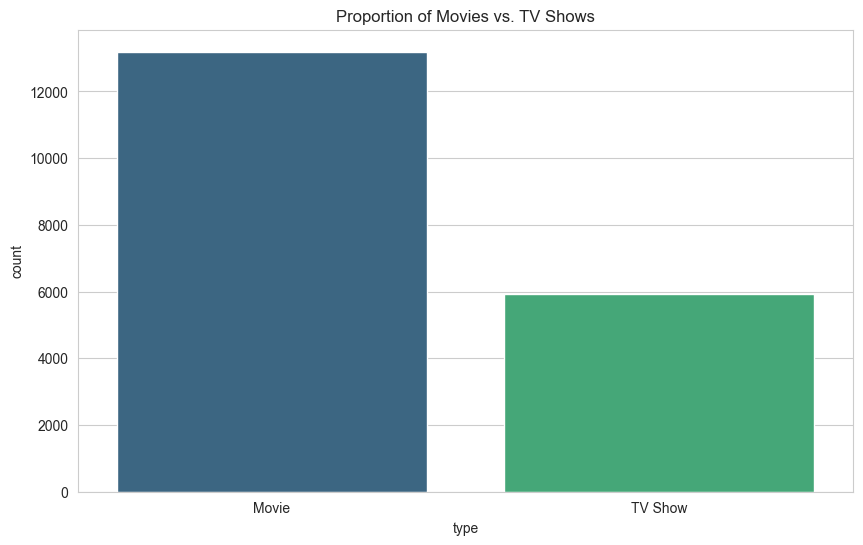

In [963]:
# Analyzing the proportion of movies vs. TV shows
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='type', data=Netflix, palette='viridis')
plt.title('Proportion of Movies vs. TV Shows')
plt.show()

In [964]:
top_genres = Netflix['listed_in'].value_counts().head(10)
print('the top 10 genres in the dataset are :')
top_genres

the top 10 genres in the dataset are :


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1328
Documentaries                869
Action & Adventure           859
Independent Movies           756
TV Dramas                    739
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

C:\Users\Mohsu\AppData\Local\Temp\ipykernel_17184\2457569104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres, y=top_genres.index, palette='viridis')


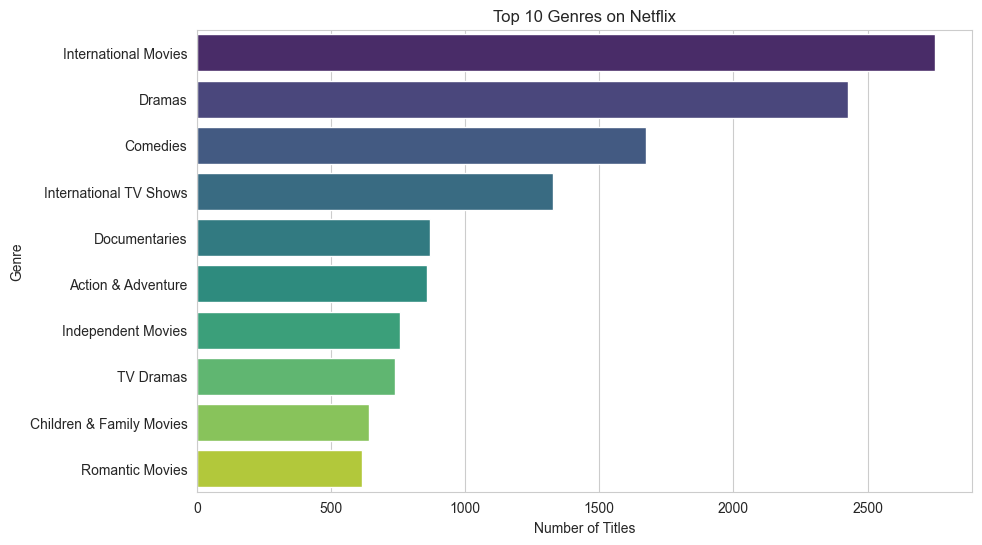

In [965]:

# visualizing the top 10 genres on Netflix
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(x=top_genres, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [966]:
# analyzing the top 10 countries in the dataset
top_countries = Netflix['country'].value_counts().head(10)
print('the top 10 countries in the dataset are :')
top_countries

the top 10 countries in the dataset are :


country
United States     4932
India             2623
Unknown           1715
United Kingdom     915
Japan              580
South Korea        555
Spain              372
Canada             330
France             303
Turkey             278
Name: count, dtype: int64

C:\Users\Mohsu\AppData\Local\Temp\ipykernel_17184\1864351851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries, y=top_countries.index, palette='viridis')


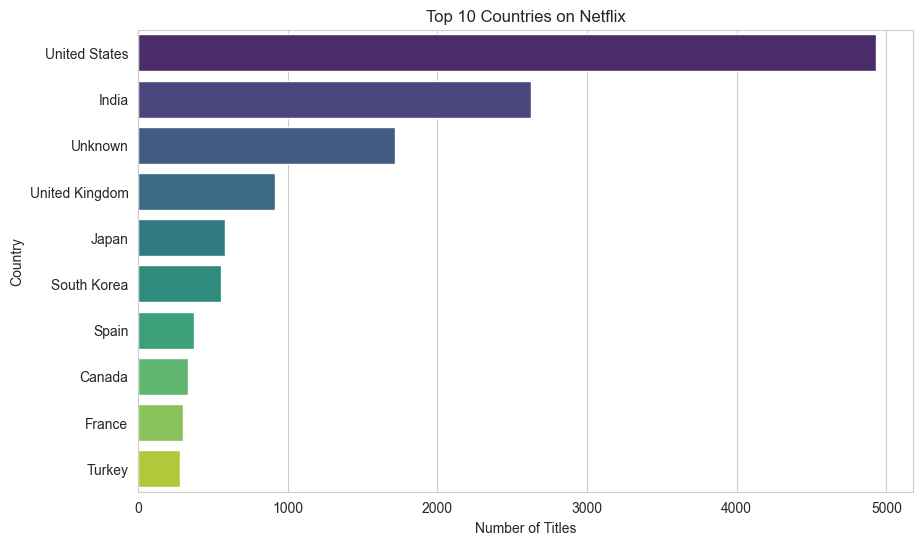

In [967]:
# visualizing the top 10 countries on Netflix
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(x=top_countries, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [968]:
# analyzing the number of titles added to Netflix over time
titles_added = Netflix['year_added'].value_counts().sort_index()
print('the number of titles added to Netflix over time are :')
titles_added

the number of titles added to Netflix over time are :


year_added
2008       4
2009       3
2010       2
2011      19
2012       4
2013      21
2014      34
2015     135
2016     835
2017    2539
2018    3624
2019    4472
2020    4160
2021    3268
Name: count, dtype: int64

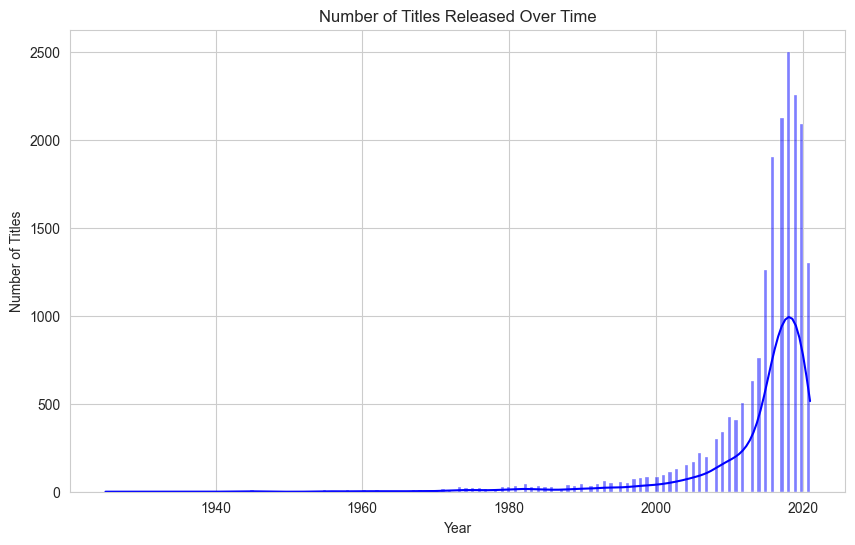

In [969]:
# Trends over time (release year)
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.histplot(Netflix['release_year'], kde=True, color='blue')
plt.title('Number of Titles Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


In [970]:
# analysing Rating distribution across genres
rating = Netflix['rating'].value_counts()
print('the rating distribution across genres are :')
rating


the rating distribution across genres are :


rating
Adults        8842
Teens         6190
Older Kids    2994
general        518
Kids           397
Not Rated      179
Name: count, dtype: int64

C:\Users\Mohsu\AppData\Local\Temp\ipykernel_17184\3651028037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=Netflix, palette='viridis', order=Netflix['rating'].value_counts().index)


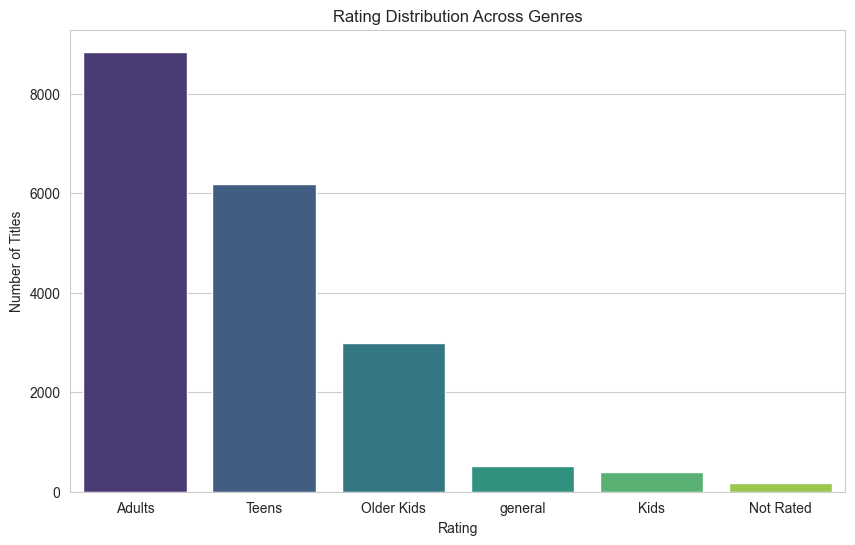

In [971]:
# Rating distribution across genres
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(x='rating', data=Netflix, palette='viridis', order=Netflix['rating'].value_counts().index)
plt.title('Rating Distribution Across Genres')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()


### Conclusion:
- **Content Focus:** Netflix’s primary focus is on movies, with a growing emphasis on global and international content. The increase in the release of movies and international TV shows signals that Netflix is positioning itself to appeal to diverse, global audiences.

- **Global Expansion:** While the United States continues to be the primary source of content, the growing presence of countries like India, South Korea, and Japan showcases Netflix’s ongoing effort to strengthen its international catalog.

- **Genre Trends:** The popularity of genres such as dramas, comedies, and international movies reflects Netflix’s ability to cater to both Western and global tastes. It also highlights an increasing demand for diverse content across regions , Netflix’s strategy of focusing on diverse age groups, with a strong emphasis on adults, but a clear commitment to expanding content for teens and children as well